**Autism Spectrum Disorder**


**Importing Libraries**

In [ ]:
# Import the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

**Loading Data**

In [ ]:
# Load the AutismData

Autism_data = pd.read_csv('Autism_Data.csv')

In [ ]:
# Copy to back-up file

Autism_data_bk = Autism_data.copy()

In [ ]:
# Display first 5 Values

Autism_data.head()

,Case_No,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Q-chat-10,Gender,Ethnicity,Jaundice,Family_mem_with_ASD,Test_Person,ASD_Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [ ]:
# Display the shape

Autism_data.shape

(1054, 19)

In [ ]:
# Display the Autism_data information

Autism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Case_No              1054 non-null   int64 
 1   A1_Score             1054 non-null   int64 
 2   A2_Score             1054 non-null   int64 
 3   A3_Score             1054 non-null   int64 
 4   A4_Score             1054 non-null   int64 
 5   A5_Score             1054 non-null   int64 
 6   A6_Score             1054 non-null   int64 
 7   A7_Score             1054 non-null   int64 
 8   A8_Score             1054 non-null   int64 
 9   A9_Score             1054 non-null   int64 
 10  A10_Score            1054 non-null   int64 
 11  Age                  1054 non-null   int64 
 12  Q-chat-10            1054 non-null   int64 
 13  Gender               1054 non-null   object
 14  Ethnicity            1054 non-null   object
 15  Jaundice             1054 non-null   object
 16  Family

**EXPLORATORY DATA ANALYSIS**

In [ ]:
# Count the missing values by each variable, if available

Autism_data.isnull().sum()

Case_No                0
A1_Score               0
A2_Score               0
A3_Score               0
A4_Score               0
A5_Score               0
A6_Score               0
A7_Score               0
A8_Score               0
A9_Score               0
A10_Score              0
Age                    0
Q-chat-10              0
Gender                 0
Ethnicity              0
Jaundice               0
Family_mem_with_ASD    0
Test_Person            0
ASD_Traits             0
dtype: int64

In [ ]:
# Display the unique values of all the variables

Autism_data.nunique()

Case_No                1054
A1_Score                  2
A2_Score                  2
A3_Score                  2
A4_Score                  2
A5_Score                  2
A6_Score                  2
A7_Score                  2
A8_Score                  2
A9_Score                  2
A10_Score                 2
Age                      25
Q-chat-10                11
Gender                    2
Ethnicity                11
Jaundice                  2
Family_mem_with_ASD       2
Test_Person               5
ASD_Traits                2
dtype: int64

In [ ]:
Autism_data["Ethnicity"].value_counts()

Ethnicity
White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
mixed               8
Pacifica            8
Native Indian       3
Name: count, dtype: int64

In [ ]:
Autism_data["Ethnicity"] = Autism_data["Ethnicity"].replace("mixed", "Others")
Autism_data["Ethnicity"] = Autism_data["Ethnicity"].replace("Native Indian", "South Asian")
Autism_data["Ethnicity"] = Autism_data["Ethnicity"].replace("asian", "Other Asians")
Autism_data["Ethnicity"] = Autism_data["Ethnicity"].replace("middle eastern", "Middle Eastern")
Autism_data["Ethnicity"] = Autism_data["Ethnicity"].replace("south asian", "South Asian")
Autism_data["Ethnicity"] = Autism_data["Ethnicity"].replace("black", "African")

In [ ]:
Autism_data["Ethnicity"].value_counts()

Ethnicity
White European    334
Other Asians      299
Middle Eastern    188
South Asian        63
African            53
Others             43
Hispanic           40
Latino             26
Pacifica            8
Name: count, dtype: int64

In [ ]:
Autism_data["Test_Person"].unique()

array(['family member', 'Health Care Professional',
       'Health care professional', 'Self', 'Others'], dtype=object)

In [ ]:
Autism_data["Test_Person"] = Autism_data["Test_Person"].replace("family member", "Family Member")
Autism_data["Test_Person"] = Autism_data["Test_Person"].replace("Health care professional", "Health Care Professional")

In [ ]:
Autism_data["Test_Person"].value_counts()

Test_Person
Family Member               1018
Health Care Professional      29
Self                           4
Others                         3
Name: count, dtype: int64

In [ ]:
# Displaying Duplicate values with in  dataset, if avialble

Autism_data_dup = Autism_data[Autism_data.duplicated(keep='last')]
Autism_data_dup

,Case_No,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Q-chat-10,Gender,Ethnicity,Jaundice,Family_mem_with_ASD,Test_Person,ASD_Traits


**2. Preparing the Data**

In [ ]:
# Identify the numerical and categorical variables

num_vars = Autism_data.columns[Autism_data.dtypes != 'object']
cat_vars = Autism_data.columns[Autism_data.dtypes == 'object']
print(num_vars)
print(cat_vars)

Index(['Case_No', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age',
       'Q-chat-10'],
      dtype='object')
Index(['Gender', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Test_Person',
       'ASD_Traits'],
      dtype='object')


In [ ]:
Autism_data.describe()

,Case_No,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Q-chat-10
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [ ]:
Autism_data.iloc[:, 13:].head(1)

,Gender,Ethnicity,Jaundice,Family_mem_with_ASD,Test_Person,ASD_Traits
0,f,Middle Eastern,yes,no,Family Member,No


**Data Visualization**

In [ ]:
for col in Autism_data.iloc[:, 13: ]:
  print(col,"\n", Autism_data[col].unique(), "\n")

Gender 
 ['f' 'm'] 

Ethnicity 
 ['Middle Eastern' 'White European' 'Hispanic' 'African' 'Other Asians'
 'South Asian' 'Others' 'Latino' 'Pacifica'] 

Jaundice 
 ['yes' 'no'] 

Family_mem_with_ASD 
 ['no' 'yes'] 

Test_Person 
 ['Family Member' 'Health Care Professional' 'Self' 'Others'] 

ASD_Traits 
 ['No' 'Yes'] 



In [ ]:
# Identify columns with non-numerical data
non_numeric_cols = Autism_data.select_dtypes(exclude=['number']).columns


In [ ]:
 #Convert non-numerical columns to numerical (replace 'method' with a suitable encoding strategy)
for col in non_numeric_cols:
    Autism_data[col] = pd.factorize(Autism_data[col])[0]  # Example using factorize, adjust as needed

<Axes: >

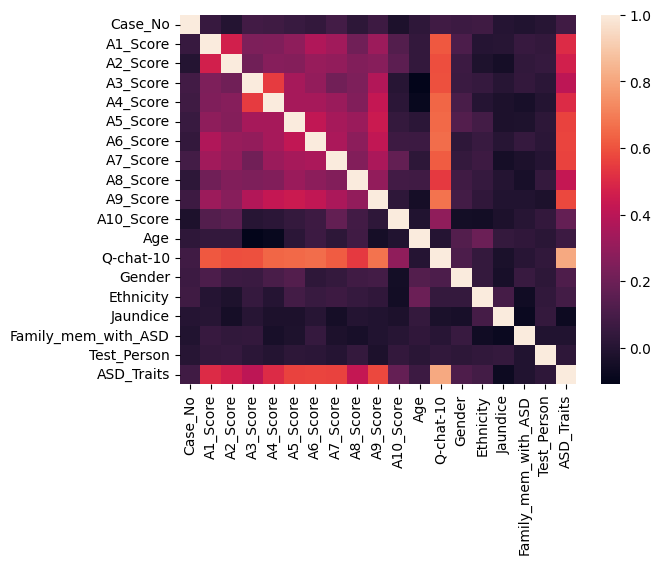

In [ ]:
sns.heatmap(Autism_data.corr())

In [ ]:
Autism_data.iloc[:, 1:11].head(1)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0,0,0,0,0,0,1,1,0,1


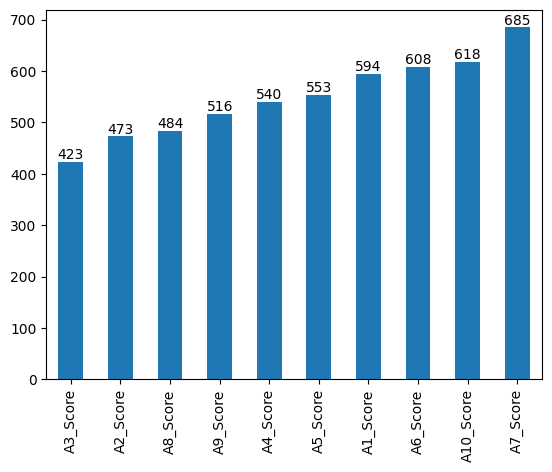

In [ ]:
axis = Autism_data.iloc[:, 1:11].sum().sort_values().plot(kind="bar")
axis.bar_label(axis.containers[0]);

**Univariate Analysis**

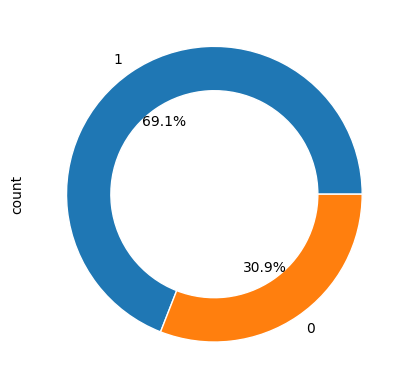

In [ ]:
Autism_data["ASD_Traits"].value_counts().plot(kind="pie", autopct="%1.1f%%", wedgeprops=dict(width=.3, edgecolor='w'));

**Countplot of all features in the dataset**

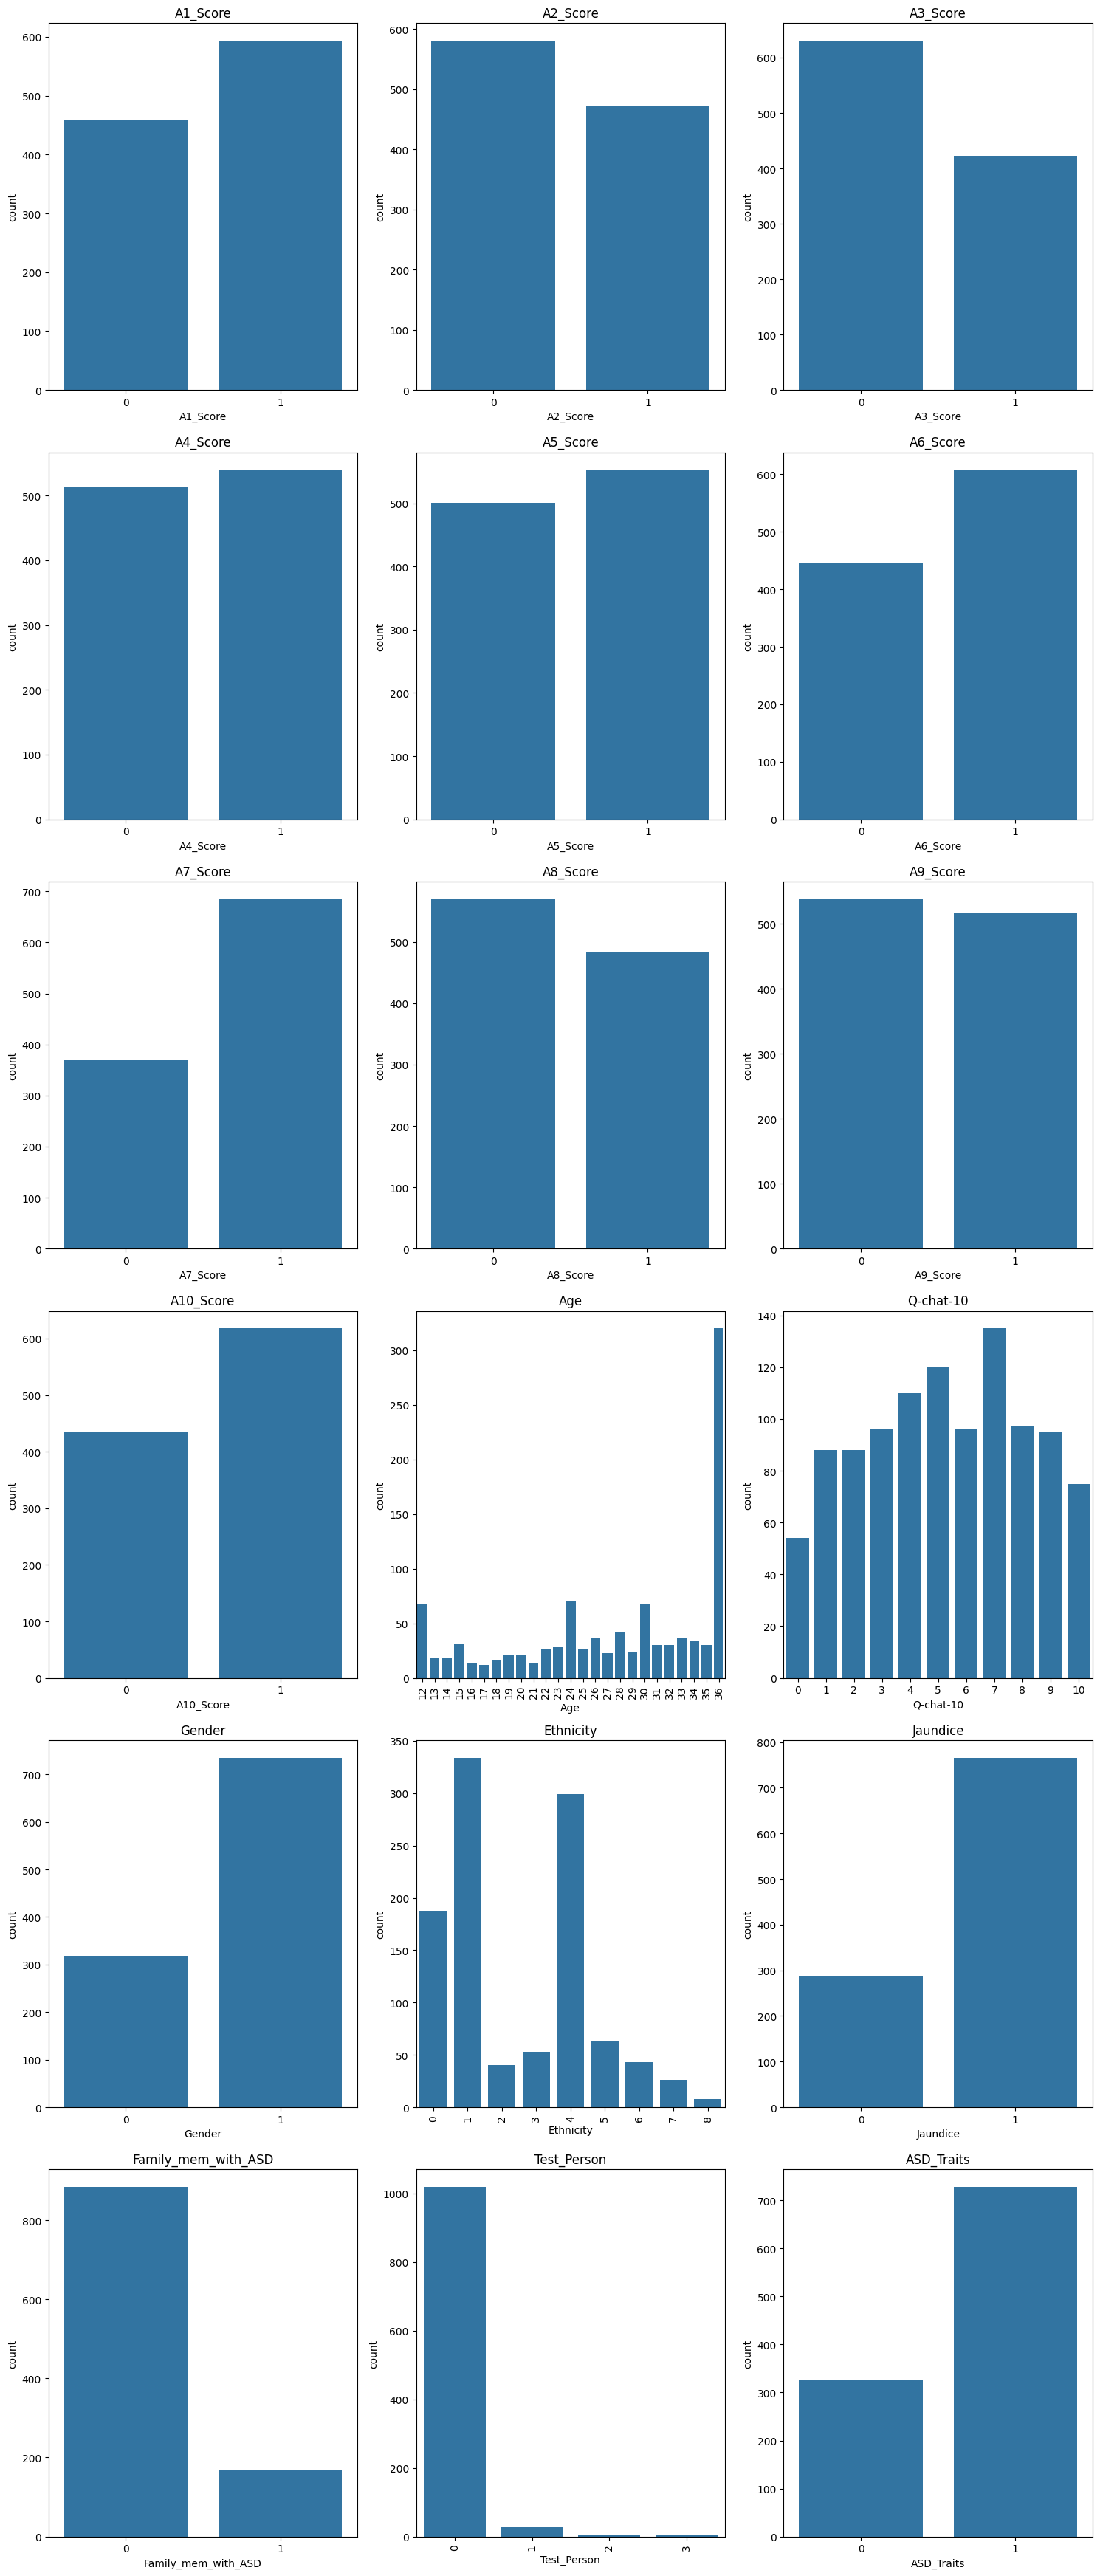

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))

axes = axes.ravel()
for i, col in enumerate(Autism_data.iloc[:,1:]):
    sns.countplot(x=Autism_data[col], ax=axes[i])
    axes[i].set_title(col)
    if col == "Test_Person" or col == "Ethnicity" or col == "Age":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

**Data PreProcessing**

In [ ]:
Autism_data.drop(columns=["Case_No"], inplace=True)

In [ ]:
Autism_data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age', 'Q-chat-10',
       'Gender', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Test_Person',
       'ASD_Traits'],
      dtype='object')

In [ ]:
# Count the target or dependent variable by '0' & '1' and
# their proportion (>= 10 : 1, then the dataset is imbalance dataset)

Target_count = Autism_data.ASD_Traits.value_counts()
print('Class 0:', Target_count[0])
print('Class 1:', Target_count[1])
print('Proportion:', round(Target_count[0] / Target_count[1], 2), ': 1')
print('Total loans Trans:', len(Autism_data))

Class 0: 326
Class 1: 728
Proportion: 0.45 : 1
Total loans Trans: 1054


**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Autism_data['Gender'] = LE.fit_transform(Autism_data['Gender'])
Autism_data['Jaundice'] = LE.fit_transform(Autism_data['Jaundice'])
Autism_data['Family_mem_with_ASD'] = LE.fit_transform(Autism_data['Family_mem_with_ASD'])
Autism_data['ASD_Traits'] = LE.fit_transform(Autism_data['ASD_Traits'])
Autism_data['Ethnicity'] = LE.fit_transform(Autism_data['Ethnicity'])
Autism_data['Test_Person'] = LE.fit_transform(Autism_data['Test_Person'])

In [ ]:
# Copy to back-up file

Autism_data_bk2 = Autism_data.copy()
Autism_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Q-chat-10,Gender,Ethnicity,Jaundice,Family_mem_with_ASD,Test_Person,ASD_Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,0,0,0,0,0,0
1,1,1,0,0,0,1,1,0,0,0,36,4,1,1,0,0,0,1
2,1,0,0,0,0,0,1,1,0,1,36,4,1,0,0,0,0,1
3,1,1,1,1,1,1,1,1,1,1,24,10,1,2,1,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,9,0,1,1,1,0,1


**One-Hot_Coding**

In [ ]:
Autism_data = pd.get_dummies(Autism_data, columns=["Ethnicity", "Test_Person"], drop_first=True)
Autism_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Q-chat-10,Gender,Jaundice,Family_mem_with_ASD,ASD_Traits,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,Ethnicity_5,Ethnicity_6,Ethnicity_7,Ethnicity_8,Test_Person_1,Test_Person_2,Test_Person_3
0,0,0,0,0,0,0,1,1,0,1,28,3,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False
1,1,1,0,0,0,1,1,0,0,0,36,4,1,0,0,1,True,False,False,False,False,False,False,False,False,False,False
2,1,0,0,0,0,0,1,1,0,1,36,4,1,0,0,1,False,False,False,False,False,False,False,False,False,False,False
3,1,1,1,1,1,1,1,1,1,1,24,10,1,1,0,1,False,True,False,False,False,False,False,False,False,False,False
4,1,1,0,1,1,1,1,1,1,1,20,9,0,1,1,1,True,False,False,False,False,False,False,False,False,False,False


**Data Splitting**

In [ ]:
x = Autism_data.drop(columns=['ASD_Traits'])
y = Autism_data['ASD_Traits']

**Feature Scaling**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train_spilt = sc.fit_transform(x_train)
x_test_spilt = sc.transform(x_test)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((843, 26), (211, 26), (843,), (211,))

**Model Building**

In [ ]:
def train_model(model, x_train, y_train, x_test, y_test):

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    score_df = pd.DataFrame([[accuracy, precision, recall, f1]],
                            columns=["accuracy", "precision", "recall", "f1"])
    return score_df

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

**Logistic Regression**

In [ ]:
model = LogisticRegression()

results = train_model(model, x_train_spilt, y_train, x_test_spilt, y_test)

results.index = ["Logistic Regression"]
results

,accuracy,precision,recall,f1
Logistic Regression,1.0,1.0,1.0,1.0


**Ensemble Techniques**

In [ ]:
# RandomForestClassifier

model = RandomForestClassifier()
random_forest_results = train_model(model, x_train_spilt, y_train, x_test_spilt, y_test)
random_forest_results.index = ["Random Forest Classifier"]
results = pd.concat([results, random_forest_results])
results

,accuracy,precision,recall,f1
Logistic Regression,1.0,1.0,1.0,1.0
Random Forest Classifier,1.0,1.0,1.0,1.0


**AdaBoostClassifier**

In [ ]:
# AdaBoostClassifier

model = AdaBoostClassifier()
ada_boost_results = train_model(model, x_train_spilt, y_train, x_test_spilt, y_test)

ada_boost_results.index = ["Ada Boost Classifier"]

results = pd.concat([results, ada_boost_results])
results

,accuracy,precision,recall,f1
Logistic Regression,1.0,1.0,1.0,1.0
Random Forest Classifier,1.0,1.0,1.0,1.0
Ada Boost Classifier,1.0,1.0,1.0,1.0


**Support Vector Machine**

In [ ]:
model = SVC()
svm_results = train_model(model, x_train_spilt, y_train, x_test_spilt, y_test)

svm_results.index = ["SVM Classifier"]

results = pd.concat ([results, svm_results])
results

,accuracy,precision,recall,f1
Logistic Regression,1.000000,1.000000,1.0,1.000000
Random Forest Classifier,1.000000,1.000000,1.0,1.000000
Ada Boost Classifier,1.000000,1.000000,1.0,1.000000
SVM Classifier,0.995261,0.993007,1.0,0.996491


**KNN**

In [ ]:
model = KNeighborsClassifier()
knn_results = train_model(model, x_train_spilt, y_train, x_test_spilt, y_test)

knn_results.index = ["KNeighbors Classifier"]

results = pd.concat ([results, knn_results])
results

,accuracy,precision,recall,f1
Logistic Regression,1.000000,1.000000,1.000000,1.000000
Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
Ada Boost Classifier,1.000000,1.000000,1.000000,1.000000
SVM Classifier,0.995261,0.993007,1.000000,0.996491
KNeighbors Classifier,0.962085,1.000000,0.943662,0.971014


In [ ]:
model = DecisionTreeClassifier()
DecisionTreeClassifier_results = train_model(model, x_train_spilt, y_train, x_test_spilt, y_test)

DecisionTreeClassifier_results.index = ["DecisionTreeClassifier"]

results = pd.concat([results, DecisionTreeClassifier_results])
results

,accuracy,precision,recall,f1
Logistic Regression,1.000000,1.000000,1.000000,1.000000
Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
Ada Boost Classifier,1.000000,1.000000,1.000000,1.000000
SVM Classifier,0.995261,0.993007,1.000000,0.996491
KNeighbors Classifier,0.962085,1.000000,0.943662,0.971014
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000


In [ ]:
results = results.T
results.shape

(4, 6)

In [ ]:
results

,Logistic Regression,Random Forest Classifier,Ada Boost Classifier,SVM Classifier,KNeighbors Classifier,DecisionTreeClassifier
accuracy,1.0,1.0,1.0,0.995261,0.962085,1.0
precision,1.0,1.0,1.0,0.993007,1.000000,1.0
recall,1.0,1.0,1.0,1.000000,0.943662,1.0
f1,1.0,1.0,1.0,0.996491,0.971014,1.0
